# THỰC HÀNH: LÀM SẠCH DỮ LIỆU CƠ BẢN 

## **Nội dung**: Xử lý dữ liệu y khoa về nhịp tim của bệnh nhân

1. Tiến hành hiểu dữ liệu từ chuyên gia 
“The data set has been kept small enough for you to be able to grok it all at once. The 
data is in csv format. Each row in the dataset has data about different individuals and 
their heart rate details for different time intervals. The columns contain information such 
as individual’s Age, Weight, Sex and Heart Rates taken at different time intervals.” 

2. Thông thường ta thường xử lý các vấn đề sau về dữ liệu 
   1. Missing headers in the csv file 
   2. Multiple variables are stored in one column 
   3. Column data contains inconsistent unit values 
   4. An empty row in the data 
   5. Duplicate records in the data 
   6. Non-ASCII characters 
   7. Missing values 
   8. Column headers are values and not variable names  

3. Tiến hành tải dữ liệu vào chương trình ứng dụng Python và giải quyết vấn đề “Missing 
header in the csv file”

In [141]:
import pandas as pd

In [142]:
columns = ['Id', 'Name', 'Age', 'Weight', 'm006', 'm0612', 'm1218', 'f006', 'f0612', 'f1218']

In [143]:
df = pd.read_csv('week01/patient_heart_rate.csv', names=columns)

In [144]:
df.head(10)

,Id,Name,Age,Weight,m006,m0612,m1218,f006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
5,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72
6,7.0,Dewey McDuck,19.0,56kgs,-,-,-,71,78,75
7,8.0,Scööpy Doo,32.0,78kgs,78,76,75,-,-,-
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. Xử lý vấn đề một cột lưu hỗn hợp nhiều dữ liệu, ở đây là cột “**Name**” chứa bao gồm 
“**Firstname**” và “**Lastname”**, giải pháp là ta sẽ tách ra làm 2 cột  

In [145]:
# expand=True to return a DataFrame else return a Series
df[['First Name', 'Last Name']] = df['Name'].str.split(expand=True) 

# axis=1 to drop a column else drop a row
df.drop('Name', axis=1, inplace=True)

In [146]:
df.head()

,Id,Age,Weight,m006,m0612,m1218,f006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


5. Cột Weight có vấn đề về không thống nhất các đơn vị đo lường trong dữ liệu. Ta sẽ 
chuyển các đơn vị về thành đơn vị chuẩn “kg” 


In [147]:
weights = df['Weight']

# for i in range(len(weights)):
#     weight = str(weights[i])
#     if 'lbs' in weight:
#         weight = weight.replace('lbs', '')
#         weight = float(weight)
#         weight = int(weight / 2.2)
#         weights[i] = weight
#     elif 'kgs' in weight:
#         weight = weight.replace('kgs', '')
#         weight = float(weight)
#         weights[i] = weight

def convert_weight(weight):
    weight = str(weight)
    if 'lbs' in weight:
        weight = weight.replace('lbs', '')
        weight = float(weight)
        weight = int(weight / 2.2)
    elif 'kgs' in weight:
        weight = weight.replace('kgs', '')
        weight = float(weight)
    return weight

df['Weight'] = df['Weight'].apply(convert_weight)

In [148]:
df.rename(columns={"Weight": "Weight_kgs"}, inplace=True)

In [149]:
df.head(17)

,Id,Age,Weight_kgs,m006,m0612,m1218,f006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70.0,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,nan,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78.0,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56.0,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78.0,78,76,75,-,-,-,Scööpy,Doo
8,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


6. Vấn đề về xuất hiện dòng dữ liệu rỗng (không có giá trị: NaN). Giải pháp có thể đưa ra là 
xóa bỏ

In [150]:
df.dropna(how='all', inplace=True)

7. Có nhiều dòng dữ liệu bị trùng lắp thông tin hoàn toàn[fullname, lastname, age, 
weight_kgs,....], giải pháp đưa ra là chỉ giữ lại một dòng dữ liệu, tuy nhiên giải pháp phải 
dựa trên nghiệp vụ của tập dữ liệu và quan sát của người xử lý.

In [151]:
df = df.drop_duplicates(subset=['First Name', 'Last Name', 'Age', 'Weight_kgs'])

8. Xuất hiện dữ liệu bị ảnh hưởng bởi lỗi non-ASCII, không định dạng ASCII. Giải pháp: 
Tùy vào nghiệp vụ ta có thể: xóa dữ liệu tại đó, thay thế bằng dữ liệu khác hoặc thay 
bằng việc đánh dấu bằng một kí tự khác (ví dụ: ‘warning’)

In [154]:
# df['First Name'].replace({r'[^\x00-\x7F]': ''}, regex=True, inplace=True)
# df['Last Name'].replace({r'[^\x00-\x7F]': ''}, regex=True, inplace=True)

df.replace(
    {"First Name": {r"[^\x00-\x7F]": ""}, "Last Name": {r"[^\x00-\x7F]": ""}},
    regex=True,
    inplace=True,
)

In [155]:
df.head(17)

,Id,Age,Weight_kgs,m006,m0612,m1218,f006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70.0,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,nan,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78.0,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56.0,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78.0,78,76,75,-,-,-,Scpy,Doo
8,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,10.0,12.0,45.0,-,-,-,92,95,87,Louie,McDuck


9. “**Missing values**”, vấn đề này xảy ra tại các cột **“Age”**, **“Weight”** và “**Heart Rate**”. Thiếu 
dữ liệu (dữ liệu không đầy đủ) là vấn đề xảy ra nhiều trong các nguồn dữ liệu do nhiều 
nguyên nhân chủ quan lẫn khách quan. Có một vài giải pháp để xử lý vấn đề này, chủ yếu 
dựa trên kinh nghiệm và nghiệp vụ về tập dữ liệu đó. Một số giải pháp đưa đề xuất từ 
chuyên gia như sau:

   a. **Deletion**: Remove records with missing values 
   
   b. **Dummy substitution**: Replace missing values with a dummy but valid 
   value: e.g.: 0 for numerical values. 

   c. **Mean substitution**: Replace the missing values with the mean. 

   d. **Frequent substitution**: Replace the missing values with the most 
   frequent item. 

   e. **Improve the data collector**: Your business folk will talk to the clients 
   and inform them about why it is worth fixing the problem with the data 
   collector.

In [158]:
df.fillna({'Age': df['Age'].mean()}, inplace=True)

10. Thay giá trị thiếu của cân nặng bằng giá trị trung vị

In [159]:
df.fillna({'Weight_kgs': df['Weight_kgs'].median()}, inplace=True)

11. “Một cột chứa quá nhiều thông tin cần được phân rã”, như trong bài toán này ta thấy 
header “m0006” chứa các nội dung bao gồm: m → male, 0006 ~ 00-06 (lần đo chỉ số 
nhịp tim từ 00h- đến 06h). Còn giá trị thì là kết quả đo nhịp tim.

    Chúng ta sẽ tách nội dung của cột này ra làm 3 cột sau: PulseRate : giá trị nhịp tim, Sex: 
giới tính ( m: male, f: female) và time: thời gian (từ giờ-đến giờ) như sau: 
 


- Bước 1: Tạo melt dữ liệu để có cột gender_time

In [161]:
df = pd.melt(
    df,
    id_vars=['Id', 'First Name', 'Last Name', 'Age', 'Weight_kgs'],
    var_name='gender_time',
    value_name='PulseRate'
).sort_values(['Id', 'Age', 'Weight_kgs', 'First Name', 'Last Name'])

In [162]:
df

,Id,First Name,Last Name,Age,Weight_kgs,gender_time,PulseRate
0,1.0,Micky,Mous,56.0,70.0,m006,72
15,1.0,Micky,Mous,56.0,70.0,m0612,69
30,1.0,Micky,Mous,56.0,70.0,m1218,71
45,1.0,Micky,Mous,56.0,70.0,f006,-
60,1.0,Micky,Mous,56.0,70.0,f0612,-
...,...,...,...,...,...,...,...
23,NaN,NaN,NaN,34.0,nan,m0612,NaN
38,NaN,NaN,NaN,34.0,nan,m1218,NaN
53,NaN,NaN,NaN,34.0,nan,f006,NaN
68,NaN,NaN,NaN,34.0,nan,f0612,NaN


- Bước 2: Tạo data frame tạm là kết quả của việc tách cột gender_time

In [164]:
df_temp = df['gender_time'].str.extract(r"(\D)(\d+)(\d{2})", expand=True)
df_temp

,0,1,2
0,m,0,06
15,m,06,12
30,m,12,18
45,f,0,06
60,f,06,12
...,...,...,...
23,m,06,12
38,m,12,18
53,f,0,06
68,f,06,12


- Bước 3: Đặt tên cột cho data frame tạm

In [165]:
df_temp.columns = ['Gender', 'Lower_hour', 'Upper_hour']

In [166]:
df_temp

,Gender,Lower_hour,Upper_hour
0,m,0,06
15,m,06,12
30,m,12,18
45,f,0,06
60,f,06,12
...,...,...,...
23,m,06,12
38,m,12,18
53,f,0,06
68,f,06,12


- Bước 4: Nối data frame tạm vào data frame ban đầu

In [167]:
df = pd.concat([df, df_temp], axis=1)
df

,Id,First Name,Last Name,Age,Weight_kgs,gender_time,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,Micky,Mous,56.0,70.0,m006,72,m,0,06
15,1.0,Micky,Mous,56.0,70.0,m0612,69,m,06,12
30,1.0,Micky,Mous,56.0,70.0,m1218,71,m,12,18
45,1.0,Micky,Mous,56.0,70.0,f006,-,f,0,06
60,1.0,Micky,Mous,56.0,70.0,f0612,-,f,06,12
...,...,...,...,...,...,...,...,...,...,...
23,NaN,NaN,NaN,34.0,nan,m0612,NaN,m,06,12
38,NaN,NaN,NaN,34.0,nan,m1218,NaN,m,12,18
53,NaN,NaN,NaN,34.0,nan,f006,NaN,f,0,06
68,NaN,NaN,NaN,34.0,nan,f0612,NaN,f,06,12


- Bước 5: Bỏ cột gender_time

In [168]:
df = df.drop(['gender_time'], axis=1)
df

,Id,First Name,Last Name,Age,Weight_kgs,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,Micky,Mous,56.0,70.0,72,m,0,06
15,1.0,Micky,Mous,56.0,70.0,69,m,06,12
30,1.0,Micky,Mous,56.0,70.0,71,m,12,18
45,1.0,Micky,Mous,56.0,70.0,-,f,0,06
60,1.0,Micky,Mous,56.0,70.0,-,f,06,12
...,...,...,...,...,...,...,...,...,...
23,NaN,NaN,NaN,34.0,nan,NaN,m,06,12
38,NaN,NaN,NaN,34.0,nan,NaN,m,12,18
53,NaN,NaN,NaN,34.0,nan,NaN,f,0,06
68,NaN,NaN,NaN,34.0,nan,NaN,f,06,12


12. Loại bỏ hết các dòng dữ liệu thừa là những dòng có phần PulseRate có dấu - 

In [169]:
import numpy as np

In [170]:
df = df.replace('-', np.nan).dropna(subset=['PulseRate'])
df.head(10)

,Id,First Name,Last Name,Age,Weight_kgs,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,Micky,Mous,56.0,70.0,72,m,0,06
15,1.0,Micky,Mous,56.0,70.0,69,m,06,12
30,1.0,Micky,Mous,56.0,70.0,71,m,12,18
46,2.0,Donald,Duck,34.0,70,85,f,0,06
61,2.0,Donald,Duck,34.0,70,84,f,06,12
76,2.0,Donald,Duck,34.0,70,76,f,12,18
47,3.0,Mini,Mouse,16.0,nan,65,f,0,06
62,3.0,Mini,Mouse,16.0,nan,69,f,06,12
77,3.0,Mini,Mouse,16.0,nan,72,f,12,18
3,4.0,Scrooge,McDuck,34.0,78.0,78,m,0,06


13. Nhận thấy có những bệnh nhân chưa ghi nhận họ tên (ví lý do nào đó)  

In [172]:
df['First Name'].isnull().sum()
df['Last Name'].isnull().sum()

# Nhưng giá trị nhịp tim và thời gian đo nhịp tim thì đầy đủ nên dữ liệu quan tâm là trị số
# nhịp tim vẫn dùng được, nên ta thay họ, tên bị thiếu thành Unknown

df.fillna({"First Name": "Unknown"}, inplace=True)
df.fillna({"Last Name": "Unknown"}, inplace=True)

14. Sau khi xử lý thì index của dòng dữ liệu đã thay đổi lung tung, ta cần reset index lại cho 
theo khuôn mẫu

In [173]:
df = df.reset_index()

15. Sau đó, lưu trữ dữ liệu đã xử lý thành công với tên file **patient_heart_rate_clean.csv**

In [174]:
df

,index,Id,First Name,Last Name,Age,Weight_kgs,PulseRate,Gender,Lower_hour,Upper_hour
0,0,1.0,Micky,Mous,56.0,70.0,72,m,0,06
1,15,1.0,Micky,Mous,56.0,70.0,69,m,06,12
2,30,1.0,Micky,Mous,56.0,70.0,71,m,12,18
3,46,2.0,Donald,Duck,34.0,70,85,f,0,06
4,61,2.0,Donald,Duck,34.0,70,84,f,06,12
5,76,2.0,Donald,Duck,34.0,70,76,f,12,18
6,47,3.0,Mini,Mouse,16.0,nan,65,f,0,06
7,62,3.0,Mini,Mouse,16.0,nan,69,f,06,12
8,77,3.0,Mini,Mouse,16.0,nan,72,f,12,18
9,3,4.0,Scrooge,McDuck,34.0,78.0,78,m,0,06


In [175]:
df.to_csv('week01/cleaned_patient_heart_rate.csv')

# PHÂN TÍCH DỮ LIỆU 

In [ ]:
import matplotlib.pyplot as plt

1. Vẽ biểu đồ Pie để thể hiện tỉ lệ bệnh nhân nam và nữ 

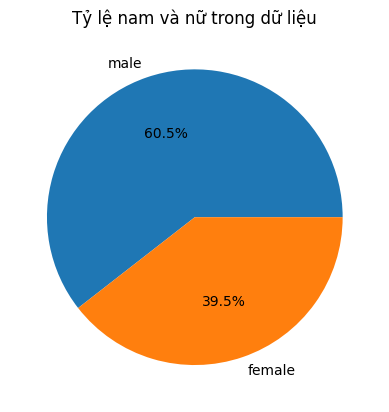

In [177]:
male, female = df['Gender'].value_counts(normalize=True)
plt.pie([male, female], labels=['male', 'female'], autopct='%1.1f%%')
plt.title('Tỷ lệ nam và nữ trong dữ liệu')
plt.show()

2. Hãy tạo cột Fullname = Firstname+’ ‘+Lastname 

In [179]:
df['Full name'] = df['First Name'] + ' ' + df['Last Name']
df.head()

,index,Id,First Name,Last Name,Age,Weight_kgs,PulseRate,Gender,Lower_hour,Upper_hour,Full name
0,0,1.0,Micky,Mous,56.0,70.0,72,m,0,06,Micky Mous
1,15,1.0,Micky,Mous,56.0,70.0,69,m,06,12,Micky Mous
2,30,1.0,Micky,Mous,56.0,70.0,71,m,12,18,Micky Mous
3,46,2.0,Donald,Duck,34.0,70,85,f,0,06,Donald Duck
4,61,2.0,Donald,Duck,34.0,70,84,f,06,12,Donald Duck


3. Vẽ biểu đồ cột so sánh độ tuổi giữa các tên bệnh nhân 


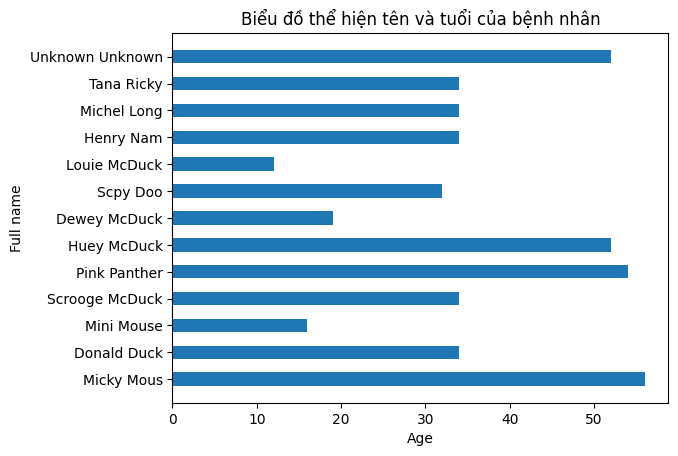

In [190]:
plt.barh(y=df['Full name'], width=df['Age'], height=0.5)
plt.ylabel("Full name")
plt.xlabel("Age")
plt.title('Biểu đồ thể hiện tên và tuổi của bệnh nhân')
plt.show()

4. Vẽ biểu đồ cột so sánh nhịp tim trung bình giữa các tên bệnh nhân 


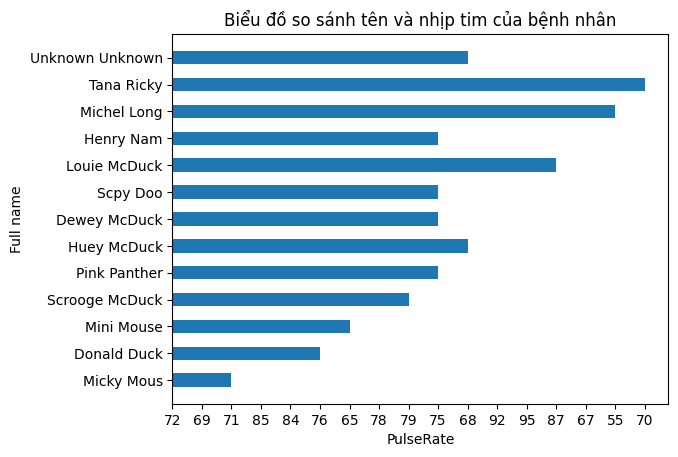

In [191]:
plt.barh(y=df["Full name"], width=df["PulseRate"], height=0.5)
plt.ylabel("Full name")
plt.xlabel("PulseRate")
plt.title("Biểu đồ so sánh tên và nhịp tim của bệnh nhân")
plt.show()

5. Vẽ biểu đồ cột so sánh nhịp tim trung bình theo từng nhóm giờ 00-06, 06-12,12-18 có 
phân loại theo giới tính 


In [194]:
df['PulseRate'] = df['PulseRate'].astype(int)
df['Lower_hour'] = df['Lower_hour'].astype(int)
df['Upper_hour'] = df['Upper_hour'].astype(int)

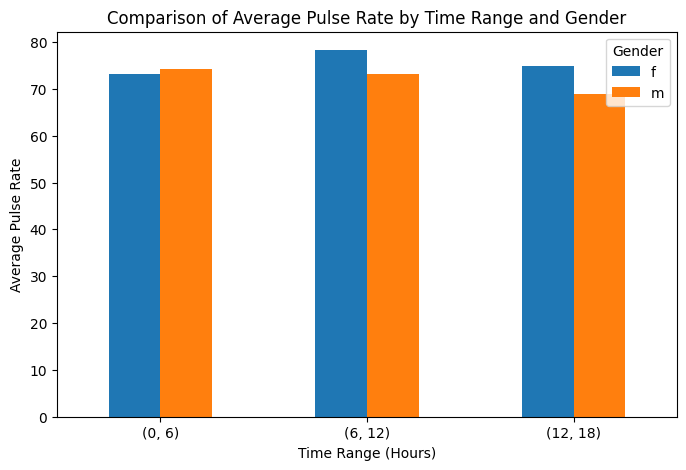

In [195]:
grouped = (
    df.groupby(["Lower_hour", "Upper_hour", "Gender"])["PulseRate"].mean().unstack()
)

ax = grouped.plot(kind="bar", figsize=(8, 5))
plt.xlabel("Time Range (Hours)")
plt.ylabel("Average Pulse Rate")
plt.title("Comparison of Average Pulse Rate by Time Range and Gender")
plt.legend(title="Gender")
plt.xticks(rotation=0)
plt.show()

6. Vẽ biểu đồ phân tán thể hiện tương quan giữa trung bình độ tuổi và trung bình nhịp tim 


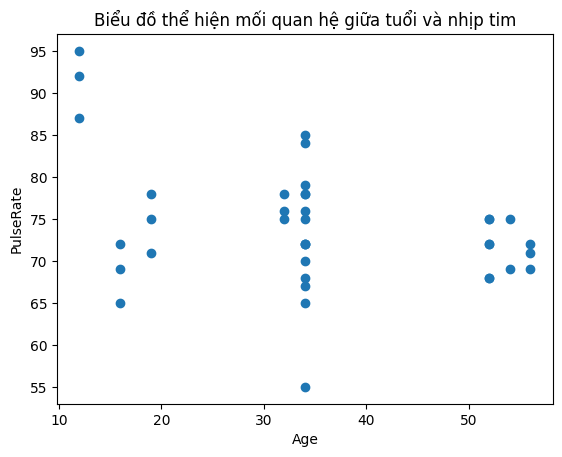

In [196]:
plt.scatter(df['Age'], df['PulseRate'])
plt.xlabel('Age')
plt.ylabel('PulseRate')
plt.title('Biểu đồ thể hiện mối quan hệ giữa tuổi và nhịp tim')
plt.show()

7. Vẽ biểu đồ đường thể hiện sự thay đổi của nhịp tim trung bình các bệnh nhân theo thứ tự 
khung giờ 00-06, 06-12,12-18 theo từng nhóm giới tính. 

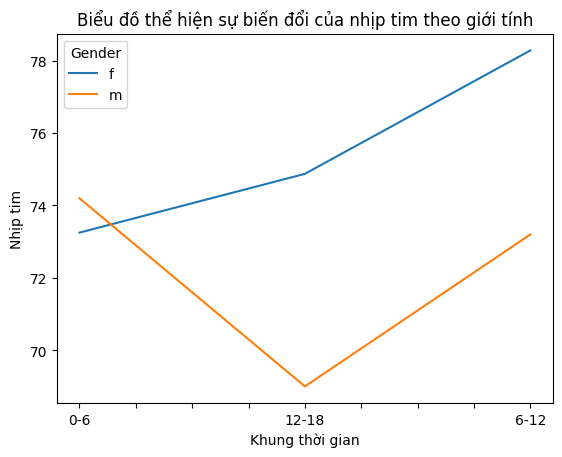

In [203]:
df["time_range"] = df["Lower_hour"].astype(str) + "-" + df["Upper_hour"].astype(str)
df.head()
df.groupby(["time_range", "Gender"])["PulseRate"].mean().unstack().plot(kind="line")
plt.title("Biểu đồ thể hiện sự biến đổi của nhịp tim theo giới tính")
plt.xlabel("Khung thời gian")
plt.ylabel("Nhịp tim")
plt.show()